In [21]:
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline  


def plot_side_by_side(first, second, t):
    if t == 'image':
        f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
        ax1.imshow(first)
        ax2.imshow(second)
    elif t == 'hist':
        f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 3))
        (_, _, _) = ax1.hist(first.flatten(), bins=255)
        (_, _, _) = ax2.hist(second.flatten(), bins=255)
    ax1.set_title("Original")
    ax2.set_title("Transformed")
    plt.show()

In [24]:
from keras.applications.resnet50 import ResNet50

# define ResNet50 model
ResNet50_model = ResNet50(weights='imagenet')
print('1')

1


In [25]:
from keras.preprocessing import image                  
from tqdm import tqdm
img_width, img_height = 224, 224

def input_to_tensor(img_path):
    # loads RGB image as PIL.Image.Image type
    img = image.load_img(img_path, target_size=(224, 224))
    # convert PIL.Image.Image type to 3D tensor with shape (224, 224, 3)
    x = image.img_to_array(img)
    # convert 3D tensor to 4D tensor with shape (1, 224, 224, 3) and return 4D tensor
    return np.expand_dims(x, axis=0)

In [26]:
from glob import glob
import numpy as np
from keras.applications.resnet50 import preprocess_input, decode_predictions


def ResNet50_predict(img_path):
    # returns prediction vector for image located at img_path
    img = preprocess_input(input_to_tensor(img_path))
    return np.argmax(ResNet50_model.predict(img))

In [27]:
import re
def search_in_dict(rakam):
    file =open('dic/imagenet1000_clsidx_to_labels.txt', 'r')
    List = file.readlines()
    x=List[rakam].split("'")
    y=x[1].split(",")
    return y[0]

# test function
search_in_dict(ResNet50_predict('scene1.jpg'))

'African elephant'

In [58]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

def processing (path):
            im = cv2.imread(path)
            THIN_THRESHOLD = 40


            im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)

            #ret, thresh = cv2.threshold(im, 127, 255, 0)
            imgray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
            ret,thresh = cv2.threshold(imgray,127,255,0)
            contours,image = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

            idx = 0
            pathes=[]
            for cnt in contours:
                idx += 1
                x, y, w, h = cv2.boundingRect(cnt)
                roi = im[y:y + h, x:x + w]
                if h < THIN_THRESHOLD or w < THIN_THRESHOLD:
                    continue
                cv2.imwrite('cnt'+str(idx) + '.jpg', roi)
                pathes.append('cnt'+str(idx) + '.jpg')
                #cv2.rectangle(im, (x, y), (x + w, y + h), (0, 0, 0), 2)
                #ResNet50_predict_labels('cnt'+str(idx) + '.jpg')
            for cnt in contours:
                idx += 1
                x, y, w, h = cv2.boundingRect(cnt)
                roi = im[y:y + h, x:x + w]
                if h < THIN_THRESHOLD or w < THIN_THRESHOLD:
                    continue


                cv2.rectangle(im, (x, y), (x + w, y + h), (0, 0, 0), 2)
                #ResNet50_predict_labels('cnt'+str(idx) + '.jpg')

           # %store pathes
            print(pathes)
            plt.imshow(im)
            p=[]
            for x in pathes:
                p.append(search_in_dict(ResNet50_predict(x)))
            
                        # Eliminate repititions
            mylist = list(dict.fromkeys(p))
            

            PluralList=[]
            for word in mylist:
                word = word+'s'
                PluralList.append(word)

            LinkingWords = ['At the begining', 'First of all', 'Then', 'So', 'And','','','']
            Subjets = ['You', 'We', 'They', 'The user', 'The observer','You','You','You']
            Verbs = ['can notice', 'may see','Would find' , 'can remark']
            Adjectives = ['some', 'alot of' ,'many', 'good amount of', 'several', 'different kinds of']
            words = PluralList
            sentence = 'Hello to "Describe my photo module". Thank you dear user for using this module. After inspecting your photo we concluded the following.'
            i=0
            j=0
            for eachword in words:
                sentence=sentence+ (LinkingWords[i]+' '+random.choice(Subjets)+' '+random.choice(Verbs)+' '+random.choice(Adjectives)+' '+words[j]+'.')
                if i>=len(LinkingWords)-1:
                    i=2
                else:
                    i=i+1
                j=j+1
            sentence
            #random.choice(LinkingWords)
    
            return sentence



['cnt166.jpg', 'cnt300.jpg', 'cnt588.jpg', 'cnt1213.jpg', 'cnt1244.jpg', 'cnt1389.jpg', 'cnt1638.jpg', 'cnt1850.jpg', 'cnt1896.jpg', 'cnt1924.jpg', 'cnt2222.jpg', 'cnt2301.jpg', 'cnt2317.jpg', 'cnt2372.jpg', 'cnt2438.jpg', 'cnt2574.jpg', 'cnt2732.jpg', 'cnt2818.jpg', 'cnt2828.jpg', 'cnt2950.jpg', 'cnt2988.jpg', 'cnt3008.jpg', 'cnt3017.jpg', 'cnt3052.jpg', 'cnt3059.jpg', 'cnt3149.jpg', 'cnt3459.jpg', 'cnt3514.jpg', 'cnt3538.jpg', 'cnt3590.jpg', 'cnt3632.jpg', 'cnt3768.jpg', 'cnt3920.jpg', 'cnt3966.jpg', 'cnt4283.jpg', 'cnt4634.jpg', 'cnt5018.jpg', 'cnt5137.jpg', 'cnt5213.jpg', 'cnt5402.jpg', 'cnt5426.jpg', 'cnt5518.jpg', 'cnt5586.jpg', 'cnt5645.jpg', 'cnt5686.jpg', 'cnt5822.jpg', 'cnt6075.jpg']
Hello to "Describe my photo module". Thank you dear user for using this module. After inspecting your photo we concluded the following.At the begining The observer can remark good amount of black-footed ferrets.First of all You can notice several jigsaw puzzles.Then You Would find some oxygen mas

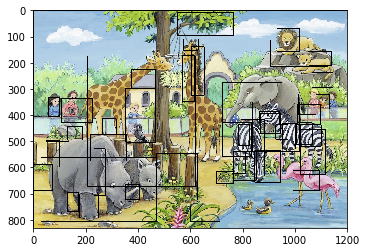

In [90]:
# Simple enough, just import everything from tkinter.
from tkinter import *
from tkinter import filedialog
import os
import random
sentence = "Diana"

#download and install pillow:
# http://www.lfd.uci.edu/~gohlke/pythonlibs/#pillow
from PIL import Image, ImageTk
#from resizeimage import resizeimage


# Here, we are creating our class, Window, and inheriting from the Frame
# class. Frame is a class from the tkinter module. (see Lib/tkinter/__init__)
class Window(Frame):
    

    # Define settings upon initialization. Here you can specify
    def __init__(self, master=None):
        
        # parameters that you want to send through the Frame class. 
        Frame.__init__(self, master)   

        #reference to the master widget, which is the tk window                 
        self.master = master

        #with that, we want to then run init_window, which doesn't yet exist
        self.init_window()

    #Creation of init_window
    def init_window(self):

        # changing the title of our master widget      
        self.master.title("Image Description Project")

        # allowing the widget to take the full space of the root window
        self.pack(fill=BOTH, expand=1)

       
        imgbtn = Button(self, text="Select an image", command=self.select_image)
        #imgbtn = Button(self, text="Select an image")
        #imgbtn.pack(side="bottom", fill="both", expand="yes", padx="50", pady="50")
        #imgbtn.pack(side="bottom", expand="yes", padx="50", pady="50")
        imgbtn.pack(side="bottom", expand="yes")
        imgbtn.place(x=100, y=30)
        
        
        txtbtn = Button(self, text="Show Description", command=self.showText)
        txtbtn.place(x=400, y=30)
        


        

    def client_exit(self):
        exit()
        
        
        
    def select_image(self):
        
        path =  filedialog.askopenfilename(initialdir = "E:/Images",title = "choose your file",filetypes = (("jpeg files",".jpg"),("all files",".*")))
        if len(path) > 0:
            filename=os.path.basename(path)
            load = Image.open(filename)
            #load1 = load.resize((128, 128))
            basewidth = 250
            wpercent = (basewidth/float(load.size[0]))
            hsize = int((float(load.size[1])*float(wpercent)))
            load2 = load.resize((basewidth,hsize), Image.ANTIALIAS)
            render = ImageTk.PhotoImage(load2)

            # labels caprint (sentencen be text or images
            img = Label(self, image=render)
            img.image = render           
            img.place(x=30, y=100)
            global sentence
            sentence = processing (path)
            print (sentence)
            

    
    def showText(self):
        #text = Label(self, text="Hey there good lookin!root window created. Here, that would be the only window, butroot window created. Here, that would be the only window, butroot window created. Here, that would be the only window, butroot window created. Here, that would be the only window, butroot window created. Here, that would be the only window, butroot window created. Here, that would be the only window, but")
        #text.pack(side="bottom", expand="yes", padx="30", pady="30")
        #text.place(x=300, y=100)
        
        text2 = Text(root, height=15, width=35)
        scroll = Scrollbar(root, command=text2.yview)
        text2.configure(yscrollcommand=scroll.set)
        text2.tag_configure('bold_italics', font=('Arial', 10, 'bold', 'italic'))
        text2.tag_configure('bold', font=('Arial', 10, 'bold'))
        text2.tag_configure('big', font=('Verdana', 8, 'bold'))
        
        text2.insert(END,' Image Description:\n', 'bold')
        quote = sentence
        text2.insert(END, quote , 'color')
        text2.pack(side=LEFT)
        #scroll.pack(side=RIGHT, fill=Y)
        scroll.pack(side=RIGHT)
        text2.place(x=300, y=100) 
       



# root window created. Here, that would be the only window, but
# you can later have windows within windows.
root = Tk()

root.geometry("600x400")

#creation of an instance
app = Window(root)


#mainloop 
root.mainloop()